In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
from load_landlab_nc_files import load_landlab_nc_files
import xarray as xr
import pickle

In [2]:
path_to_netcdf_az = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/az/'
path_to_netcdf_sg = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/sg/'
path_to_netcdf_lc = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/lc/'
path_to_netcdf_na = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/na/'

sim_list = [path_to_netcdf_az, path_to_netcdf_sg, path_to_netcdf_lc, path_to_netcdf_na]
name_list = ['az', 'sg', 'lc', 'na']

#dataDict = load_landlab_nc_files(sim_list, name_list, use_means = False, do_pickle = True, pickle_name = 'indi_pheno_types_data.p')
dataDict = load_landlab_nc_files(sim_list, name_list, use_means = False, do_pickle = False)


Data loading of az Simulation
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done


OSError: [Errno -101] NetCDF: HDF error: b'/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/az/ll_output/NC/output4998500__49985.nc'

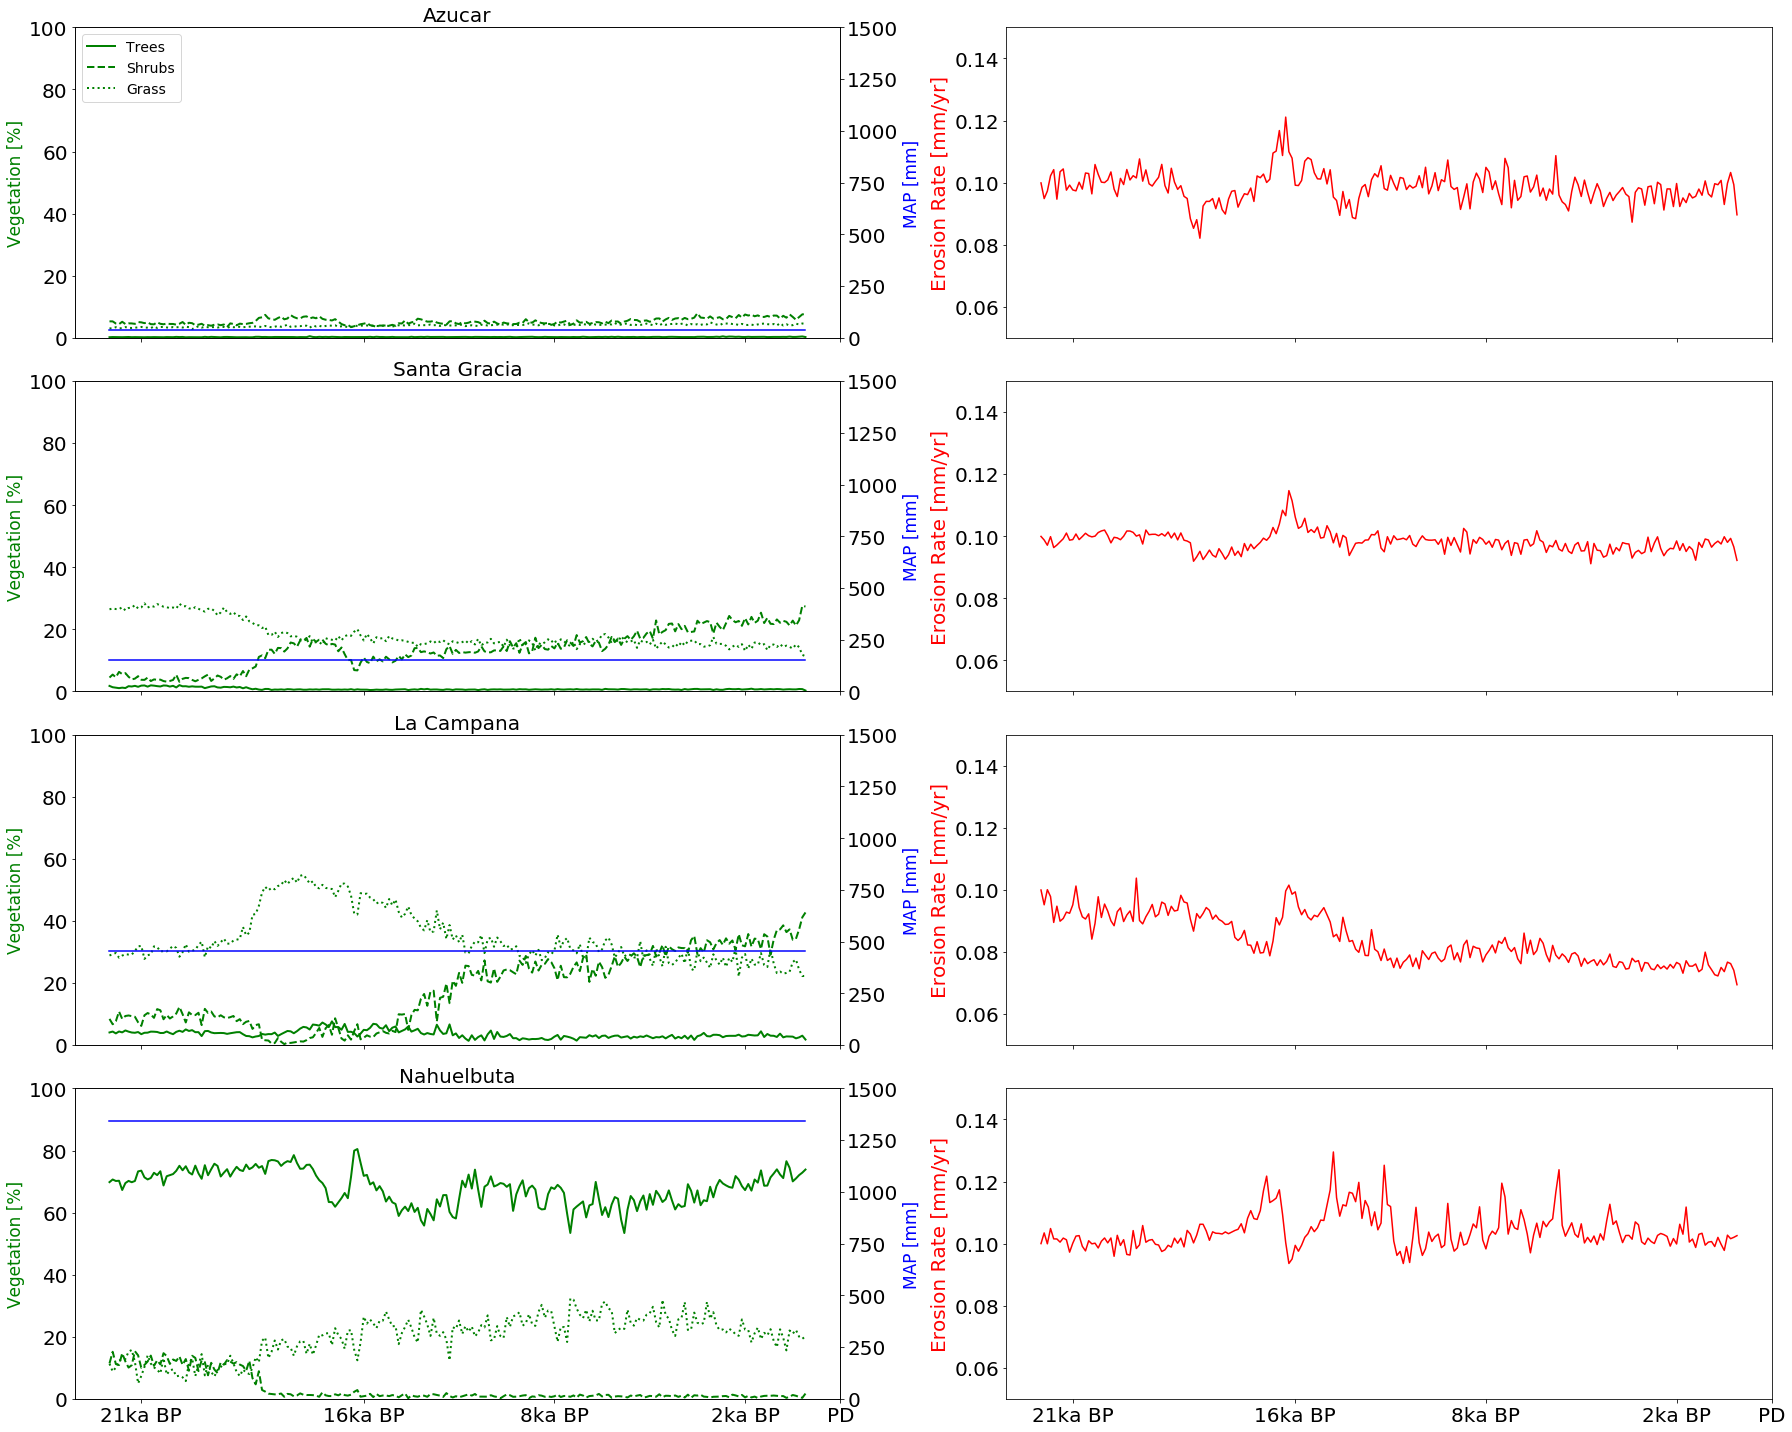

In [4]:
#data
length_of_dataseries = np.shape(dataDict['az']['erosion__rate'])[0]

minV = 490
maxV = 710
azucar_trees  = [np.mean(v)*100 for v in dataDict['az']['tree_fpc']]
azucar_shrubs = [np.mean(v)*100 for v in dataDict['az']['shrub_fpc']]
azucar_grass  = [np.mean(v)*100 for v in dataDict['az']['grass_fpc']]
azucar_soil   = [np.mean(v) for v in dataDict['az']['soil__depth']]
azucar_rain   = [np.mean(v)*10 for v in dataDict['az']['precipitation']]
azucar_erosion= [np.mean(v)*1000 for v in dataDict['az']['erosion__rate']]

azucar_trees  = azucar_trees[minV:maxV]
azucar_shrubs = azucar_shrubs[minV:maxV]
azucar_grass  = azucar_grass[minV:maxV]
azucar_soil   = azucar_soil[minV:maxV]
azucar_rain   = azucar_rain[minV:maxV]
azucar_erosion= azucar_erosion[minV:maxV]

santa_gracia_trees  = [np.mean(v)*100 for v in dataDict['sg']['tree_fpc']]
santa_gracia_shrubs = [np.mean(v)*100 for v in dataDict['sg']['shrub_fpc']]
santa_gracia_grass  = [np.mean(v)*100 for v in dataDict['sg']['grass_fpc']]
santa_gracia_soil   = [np.mean(v) for v in dataDict['sg']['soil__depth']]
santa_gracia_rain   = [np.mean(v)*10 for v in dataDict['sg']['precipitation']]
santa_gracia_erosion= [np.mean(v)*1000 for v in dataDict['sg']['erosion__rate']]

santa_gracia_trees  = santa_gracia_trees[minV:maxV]
santa_gracia_shrubs = santa_gracia_shrubs[minV:maxV]
santa_gracia_grass  = santa_gracia_grass[minV:maxV]
santa_gracia_soil   = santa_gracia_soil[minV:maxV]
santa_gracia_rain   = santa_gracia_rain[minV:maxV]
santa_gracia_erosion= santa_gracia_erosion[minV:maxV]

la_campana_trees  = [np.mean(v)*100 for v in dataDict['lc']['tree_fpc']]
la_campana_shrubs = [np.mean(v)*100 for v in dataDict['lc']['shrub_fpc']]
la_campana_grass  = [np.mean(v)*100 for v in dataDict['lc']['grass_fpc']]
la_campana_soil   = [np.mean(v) for v in dataDict['lc']['soil__depth']]
la_campana_rain   = [np.mean(v)*10 for v in dataDict['lc']['precipitation']]
la_campana_erosion= [np.mean(v)*1000 for v in dataDict['lc']['erosion__rate']]

la_campana_trees  = la_campana_trees[minV:maxV]
la_campana_shrubs = la_campana_shrubs[minV:maxV]
la_campana_grass  = la_campana_grass[minV:maxV]
la_campana_soil   = la_campana_soil[minV:maxV]
la_campana_rain   = la_campana_rain[minV:maxV]
la_campana_erosion= la_campana_erosion[minV:maxV]

nahuelbuta_trees  = [np.mean(v)*100 for v in dataDict['na']['tree_fpc']]
nahuelbuta_shrubs = [np.mean(v)*100 for v in dataDict['na']['shrub_fpc']]
nahuelbuta_grass  = [np.mean(v)*100 for v in dataDict['na']['grass_fpc']]
nahuelbuta_soil   = [np.mean(v) for v in dataDict['na']['soil__depth']]
nahuelbuta_rain   = [np.mean(v)*10 for v in dataDict['na']['precipitation']]
nahuelbuta_erosion= [np.mean(v)*1000 for v in dataDict['na']['erosion__rate']]

nahuelbuta_trees  = nahuelbuta_trees[minV:maxV]
nahuelbuta_shrubs = nahuelbuta_shrubs[minV:maxV]
nahuelbuta_grass  = nahuelbuta_grass[minV:maxV]
nahuelbuta_soil   = nahuelbuta_soil[minV:maxV]
nahuelbuta_rain   = nahuelbuta_rain[minV:maxV]
nahuelbuta_erosion= nahuelbuta_erosion[minV:maxV]

time_vector = np.arange(0, np.shape(azucar_erosion)[0] * 100, 100)



###------------------------------PLOTTING-------------------------------------------#
fig, ax = plt.subplots(4,2, figsize = [25,20], sharex = True)
#--------LEFT SIDE-----------#

#---AZUCAR
ax[0,0].plot(time_vector, azucar_trees,'g-', linewidth = 2 , label = 'Trees')
ax[0,0].plot(time_vector, azucar_shrubs,'g--', linewidth = 2, label = 'Shrubs')
ax[0,0].plot(time_vector, azucar_grass,'g:', linewidth = 2, label = 'Grass')
ax0 = ax[0,0].twinx()
ax0.plot(time_vector, azucar_rain, 'b')
ax0.set_ylim(0,1500)
ax[0,0].set_ylim(0,100)

#---SANTA GRACIA
ax[1,0].plot(time_vector, santa_gracia_trees, 'g-', linewidth = 2)
ax[1,0].plot(time_vector, santa_gracia_shrubs, 'g--', linewidth = 2)
ax[1,0].plot(time_vector, santa_gracia_grass, 'g:', linewidth = 2)
ax1 = ax[1,0].twinx()
ax1.plot(time_vector, santa_gracia_rain, 'b')
ax1.set_ylim(0,1500)
ax[1,0].set_ylim(0,100)

#---LA CAMPANA
ax[2,0].plot(time_vector, la_campana_trees, 'g-', linewidth = 2)
ax[2,0].plot(time_vector, la_campana_shrubs, 'g--', linewidth = 2)
ax[2,0].plot(time_vector, la_campana_grass, 'g:', linewidth = 2)
ax2 = ax[2,0].twinx()
ax2.plot(time_vector, la_campana_rain, 'b')
ax2.set_ylim(0,1500)
ax[2,0].set_ylim(0,100)

#---NAHUELBUTA
ax[3,0].plot(time_vector, nahuelbuta_trees, 'g-', linewidth = 2)
ax[3,0].plot(time_vector, nahuelbuta_shrubs, 'g--', linewidth = 2)
ax[3,0].plot(time_vector, nahuelbuta_grass, 'g:', linewidth = 2)
ax3 = ax[3,0].twinx()
ax3.plot(time_vector, nahuelbuta_rain, 'b')
ax3.set_ylim(0,1500)


ax[3,0].set_ylim(0,100)

#legend
ax[0,0].legend(fontsize = 14, loc = 'upper left')

#labels
ax[0,0].set_title('Azucar', fontsize = 20)
ax[1,0].set_title('Santa Gracia', fontsize = 20)
ax[2,0].set_title('La Campana', fontsize = 20)
ax[3,0].set_title('Nahuelbuta', fontsize = 20)

ax[0,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[1,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[2,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[3,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')

ax0.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax1.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax2.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax3.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
                   
                   
ax[0,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[1,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[2,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[3,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')



#formatting
ax[0,0].axes.tick_params(labelsize = 20)
ax[1,0].axes.tick_params(labelsize = 20)
ax[2,0].axes.tick_params(labelsize = 20)
ax[3,0].axes.tick_params(labelsize = 20)
ax[0,1].axes.tick_params(labelsize = 20)
ax[1,1].axes.tick_params(labelsize = 20)
ax[2,1].axes.tick_params(labelsize = 20)
ax[3,1].axes.tick_params(labelsize = 20)
ax0.axes.tick_params(labelsize = 20)
ax1.axes.tick_params(labelsize = 20)
ax2.axes.tick_params(labelsize = 20)
ax3.axes.tick_params(labelsize = 20)

x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']
ax[3,0].set_xticks(x1)
ax[3,0].set_xticklabels(labels)
ax[3,1].set_xticks(x1)
ax[3,1].set_xticklabels(labels)

#--------RIGHT SIDE----------#
#---AZUCAR
ax[0,1].plot(time_vector, azucar_erosion, 'r', linewidth = 1.5)
ax[0,1].set_ylim(0.05, 0.15)
#---SANTA GRACIA
ax[1,1].plot(time_vector, santa_gracia_erosion, 'r', linewidth = 1.5)
ax[1,1].set_ylim(0.05, 0.15)
#---LA CAMPANA
ax[2,1].plot(time_vector, la_campana_erosion, 'r', linewidth = 1.5)
ax[2,1].set_ylim(0.05, 0.15)
#---NAHUELBUTA
ax[3,1].plot(time_vector, nahuelbuta_erosion, 'r', linewidth = 1.5)
ax[3,1].set_ylim(0.05, 0.15)

plt.tight_layout()

plt.savefig('erosion_rates_per_area.png', dpi = 420)